#  Statistics Mini-Project

1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis, it would be a good idea to check for any hyphens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:


In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
liga=pd.read_csv("Laliga.csv")
liga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,-,-,-,-,-,-,-,2009-10,2009-10,20
57,58,Condal,1,22,30,7,8,15,37,57,-,-,-,-,-,-,-,1956-57,1956-57,16
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,-,-,-,-,-,-,-,1951-52,1951-52,16
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,-,-,-,-,-,-,-,1955-56,1955-56,15


In [3]:
liga.replace('-',np.NaN,inplace=True)
liga.fillna('0',inplace=True)
liga['Seasons']=pd.to_numeric(liga['Seasons'])
liga['Points']=pd.to_numeric(liga['Points'])
liga['GamesPlayed']=pd.to_numeric(liga['GamesPlayed'])
liga['GamesWon']=pd.to_numeric(liga['GamesWon'])
liga['GamesDrawn']=pd.to_numeric(liga['GamesDrawn'])
liga['GamesLost']=pd.to_numeric(liga['GamesLost'])
liga['GoalsFor']=pd.to_numeric(liga['GoalsFor'])
liga['GoalsAgainst']=pd.to_numeric(liga['GoalsAgainst'])
liga['Champion']=pd.to_numeric(liga['Champion'])
liga['Runner-up']=pd.to_numeric(liga['Runner-up'])
liga['Third']=pd.to_numeric(liga['Third'])
liga['Fourth']=pd.to_numeric(liga['Fourth'])
liga['Fifth']=pd.to_numeric(liga['Fifth'])
liga['Sixth']=pd.to_numeric(liga['Sixth'])
liga['T']=pd.to_numeric(liga['T'])
liga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pos            61 non-null     int64 
 1   Team           61 non-null     object
 2   Seasons        61 non-null     int64 
 3   Points         61 non-null     int64 
 4   GamesPlayed    61 non-null     int64 
 5   GamesWon       61 non-null     int64 
 6   GamesDrawn     61 non-null     int64 
 7   GamesLost      61 non-null     int64 
 8   GoalsFor       61 non-null     int64 
 9   GoalsAgainst   61 non-null     int64 
 10  Champion       61 non-null     int64 
 11  Runner-up      61 non-null     int64 
 12  Third          61 non-null     int64 
 13  Fourth         61 non-null     int64 
 14  Fifth          61 non-null     int64 
 15  Sixth          61 non-null     int64 
 16  T              61 non-null     int64 
 17  Debut          61 non-null     object
 18  Since/LastApp  61 non-null     o

#### 1.Which are the teams which started playing between 1930-1980?

In [4]:
a=liga[liga.Debut>'1930'][liga.Debut<'1980']
b=a.loc[:,'Team']
print(b)

3                Valencia
5                 Sevilla
8                Zaragoza
9              Real Betis
10    Deportivo La Coruna
11             Celta Vigo
12             Valladolid
14         Sporting Gijon
15                Osasuna
16                 Malaga
17                 Oviedo
18               Mallorca
19             Las Palmas
21                Granada
22         Rayo Vallecano
23                  Elche
25               Hercules
26               Tenerife
27                 Murcia
28                 Alaves
29                Levante
30              Salamanca
31               Sabadell
32                  Cadiz
34              Castellon
37                Cordoba
39             Recreativo
40              Burgos CF
41             Pontevedra
46              Gimnastic
49               Alcoyano
50                   Jaen
52             AD Almeria
54                 Lleida
57                 Condal
58        Atletico Tetuan
59       Cultural Leonesa
Name: Team, dtype: object


C:\Users\LAPTOP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


#### 2.Which are the top 5 teams in terms of points?

In [5]:
liga.sort_values(by = ['Points'], ascending = False).head(5)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


#### 3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (Games Won / Games Played) *100)

In [6]:
liga['WinningPercent']= (liga['GamesWon']/liga['GamesPlayed'])*100
liga.sort_values(by = ['WinningPercent'], ascending = False)[['Team', 'WinningPercent']].head(5)

,Team,WinningPercent
0,Real Madrid,59.630702
1,Barcelona,57.241130
2,Atletico Madrid,47.475134
3,Valencia,44.557057
4,Athletic Bilbao,43.772629


C:\Users\LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


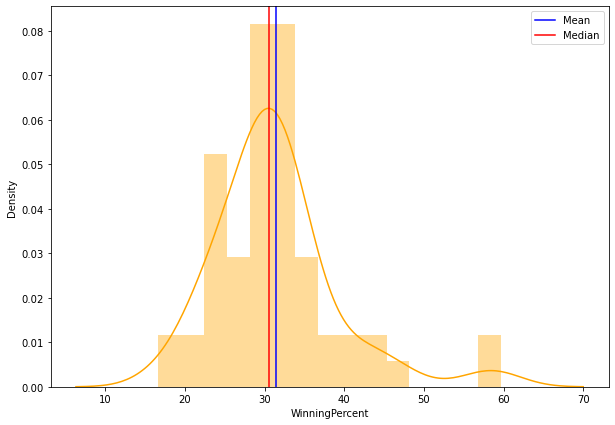

In [7]:
plt.figure(figsize=(10,7))
sns.distplot(liga['WinningPercent'], color = 'orange')
plt.axvline(liga['WinningPercent'].mean(), label='Mean', color='blue')
plt.axvline(liga['WinningPercent'].median(), label='Median', color='r')
plt.legend()
plt.show()

#### 4.Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7?



#### *Step01* : Define Hypothesis
* $H_o$ : There is no difference in the winning percentage for teams which have attained a best Position between 1-3 and those teams have had a best position between 4-7.
* $H_1$ : There is a difference in the winning percentage for teams which have attained a best Position between 1-3 and those teams have had a best position between 4-7.and

In [8]:
samp1 = liga[(liga['BestPosition']>=1) & (liga['BestPosition']<=3)][['WinningPercent']]
samp2 = liga[(liga['BestPosition']>=4) & (liga['BestPosition']<=7)][['WinningPercent']]
Test_statistic, p_value = stats.ttest_ind(samp1,samp2)
print('Test_statistic:',Test_statistic, 'P_value:',p_value)

Test_statistic: [4.99271534] P_value: [1.53621019e-05]


#### Since P_value < alpha (0.05). we reject null hypothesis. Hence there is a significant difference in the winning percentage for teams which have attained a best Position between 1-3 and those teams have had a best position between 4-7.

### 2. A study was done to measure the blood pressure of 60-year-old women with glaucoma. A random sample of 200 60-year-old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.



#### a)Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [9]:
n=200
xbar=140
std=25
se=std/np.sqrt(n)
print("The estimated standard error of the sample mean is ", se)

The estimated standard error of the sample mean is  1.7677669529663687


The standard error of a statistic is the standard deviation of its sampling distribution or an estimate of that standard deviation. If the parameter or the statistic is the mean, it is called the standard error of the mean. The sampling distribution of a population mean is generated by repeated sampling and recording of the means obtained. The standard error can be used to calculate the confidence interval at a given confidence

#### b)Estimate a 95% confidence interval for the true mean blood pressure for all 60-year-old women with glaucoma.

In [10]:
L,U = stats.t.interval(0.95,199,xbar,se)
print("The confidence interval for 95% is between ",L,'and',U)

The confidence interval for 95% is between  136.51404038839016 and 143.48595961160984


#### c)	Assume that instead of 200, a random sample of only 100 60-year-old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [11]:
n2=100
xbar2=140
std2=25
se2=std2/np.sqrt(n2)
se2

2.5

In [12]:
L1,U1= stats.t.interval(0.95,99,xbar2,se2)
print("The confidence interval for 95% is between ",L1,'and',U1)

The confidence interval for 95% is between  135.03945762122828 and 144.96054237877172


#### d)Which of the two above intervals are wider?

In [13]:
Interval_1= U-L
Interval_2= U1-L1
Interval_1,Interval_2

(6.971919223219686, 9.92108475754344)

As the second confidence interval is wider we can conclude that the interval with sample size 100 is wider, hence less acurate 

#### e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

#### Solution
* As we know standard error of a sample mean is inversly proportion to the square root of sample size.
* **se = sigma/np.sqrt(n)**
* As the sample sizes increase, the variability of each sampling distribution decreases.
* With infinite number of successive random samples, the mean of the sampling distribution is equal to the population mean (µ).
* As standard error increases, the true mean is more spread out.
* Therefore less the standard error of the sample mean, lesser is the spread of the True mean.

### 3. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

### One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.


In [14]:
df=pd.read_csv('Golf.csv')
df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


#### 1.Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.


* $H_0$ =  there is no difference between the mean distances for  current and new golf balls.
* $H_1$ =  there is difference between the mean distances for  current and new golf balls.

#### 2.Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?



In [15]:
# paired t test
tstats , Pvalue = stats.ttest_rel(df['Current'],df['New'])
print('Pvalue is:',Pvalue)
if Pvalue > 0.05:
    print('Fail to reject null hypothesis')
else: 
    print('Reject null hypothesis')

Pvalue is: 0.20916361823147053
Fail to reject null hypothesis


##### Since we fail to reject null hypothesis. Therefore, there is no difference between the mean distances for current and new golf balls.

#### 3.What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?


In [16]:
c=df.Current
n=df.New
d=c-n
size=len(d)
xbarc=np.mean(c)
xbarn=np.mean(n)
xbard=np.mean(d)
stdc=np.std(c,ddof=1)
stdn=np.std(n,ddof=1)
stdd=np.std(d,ddof=1)
sec=stdc/np.sqrt(size)
sen=stdn/np.sqrt(size)
sed=stdd/np.sqrt(size)
print('The confidence interval at 95 % confidence for the distance of current balls are',stats.t.interval(0.95,size -1,xbarc,sec))
print('The confidence interval at 95 % confidence for the distance of new balls are',stats.t.interval(0.95,size -1,xbarn,sen))
print('The confidence interval at 95 % confidence for the difference of distance between current and new balls are',stats.t.interval(0.95,size -1,xbard,sed))

The confidence interval at 95 % confidence for the distance of current balls are (267.47565965314044, 273.0743403468595)
The confidence interval at 95 % confidence for the distance of new balls are (264.33481641038986, 270.66518358961014)
The confidence interval at 95 % confidence for the difference of distance between current and new balls are (-1.620535804056375, 7.1705358040563745)
